<a href="https://colab.research.google.com/github/sahilfatima/Breast_cancer/blob/main/Sklearn_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Loading DataSet**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [ ]:
breastcancer = load_breast_cancer(as_frame=True)

In [ ]:
breastcancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
breastcancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breastcancer.target_names

array(['malignant', 'benign'], dtype='<U9')

# Plotting Main Features

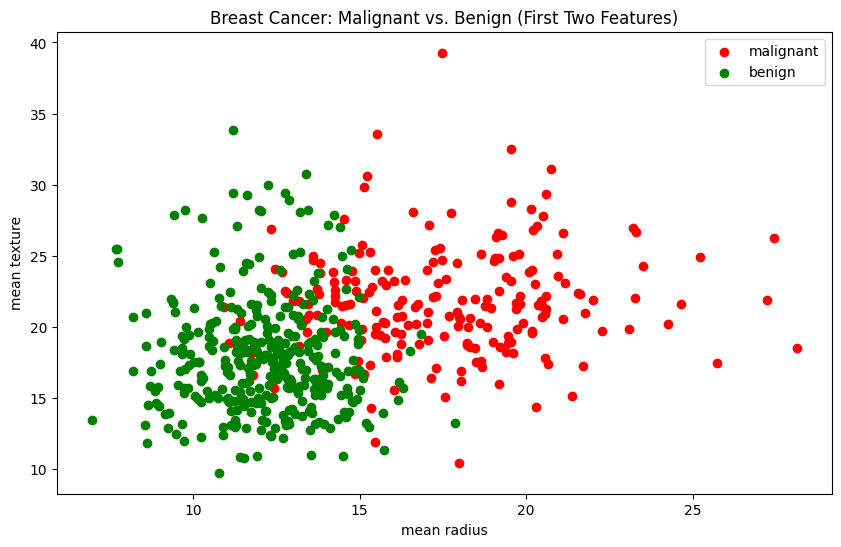

In [ ]:
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

malignant = df[df['target'] == 0]  # Target 0 corresponds to 'malignant'
benign = df[df['target'] == 1]  # Target 1 corresponds to 'benign'

plt.figure(figsize=(10, 6))

plt.scatter(malignant.iloc[:, 0], malignant.iloc[:, 1], color='red', label='malignant')

plt.scatter(benign.iloc[:, 0], benign.iloc[:, 1], color='green', label='benign')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Breast Cancer: Malignant vs. Benign (First Two Features)')
plt.legend()

plt.show()


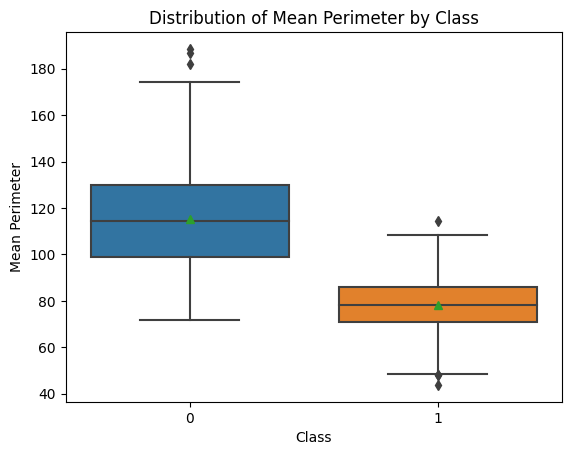

In [ ]:
sns.boxplot(
    x = "target",
    y = "mean perimeter",
    showmeans=True,
    data=df
)
plt.xlabel('Class')
plt.ylabel('Mean Perimeter')
plt.title('Distribution of Mean Perimeter by Class')
plt.show()

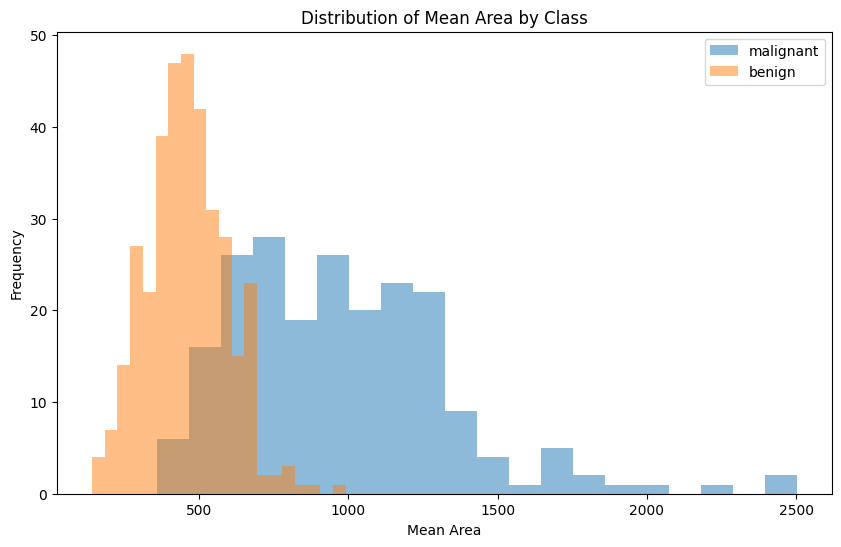

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['target'] == 0]['mean area'], bins=20, alpha=0.5, label='malignant')
plt.hist(df[df['target'] == 1]['mean area'], bins=20, alpha=0.5, label='benign')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Area by Class')
plt.legend()
plt.show()

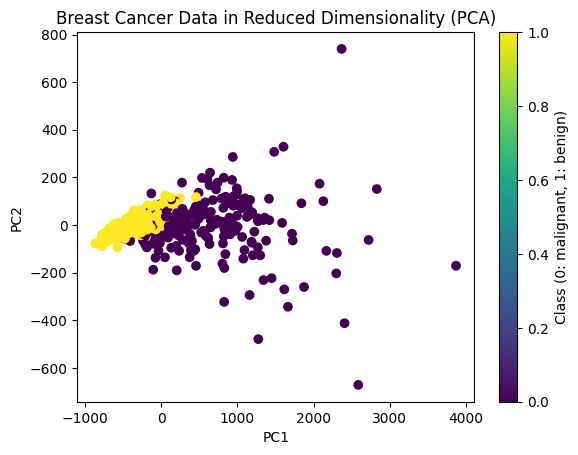

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_data = pca.fit_transform(df.iloc[:, :-1])  # Exclude target column

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer Data in Reduced Dimensionality (PCA)')
plt.colorbar(label='Class (0: malignant, 1: benign)')
plt.show()

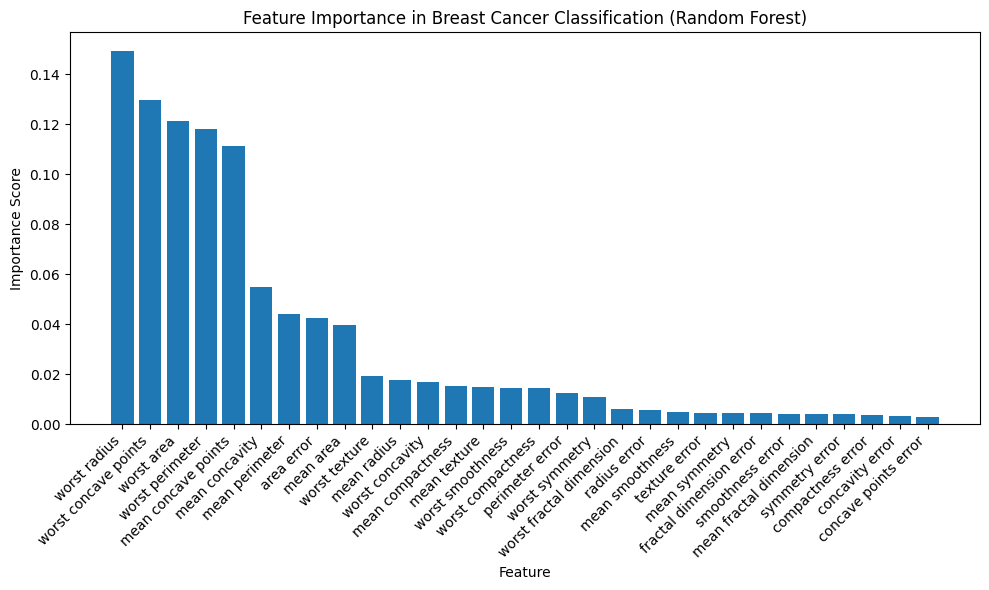

In [ ]:
X = data.data
y = data.target

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_names = data.feature_names
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Breast Cancer Classification (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()